In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('../data/cleaned_telco_customer_churn.csv')
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,num_services,tenure_category,avg_monthly_charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,0-12 months,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,4,13-36 months,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4,0-12 months,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,37+ months,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,0-12 months,75.825000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          7043 non-null   object 
 1   gender               7043 non-null   object 
 2   senior_citizen       7043 non-null   int64  
 3   partner              7043 non-null   object 
 4   dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   phone_service        7043 non-null   object 
 7   multiple_lines       7043 non-null   object 
 8   internet_service     7043 non-null   object 
 9   online_security      7043 non-null   object 
 10  online_backup        7043 non-null   object 
 11  device_protection    7043 non-null   object 
 12  tech_support         7043 non-null   object 
 13  streaming_tv         7043 non-null   object 
 14  streaming_movies     7043 non-null   object 
 15  contract             7043 non-null   o

In [4]:
df['churn'].value_counts(normalize=True) * 100

churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [5]:
churned_df = df[df['churn'] == 'Yes']
lost_monthly_revenue = churned_df['monthly_charges'].sum()

print(f"Lost Potential Monthly Revenue: ${lost_monthly_revenue:.2f}")

Lost Potential Monthly Revenue: $139130.85


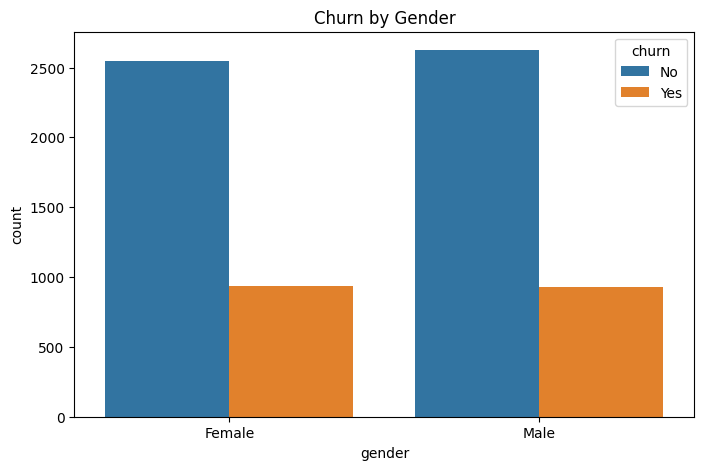

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='churn')
plt.title('Churn by Gender')
plt.show()

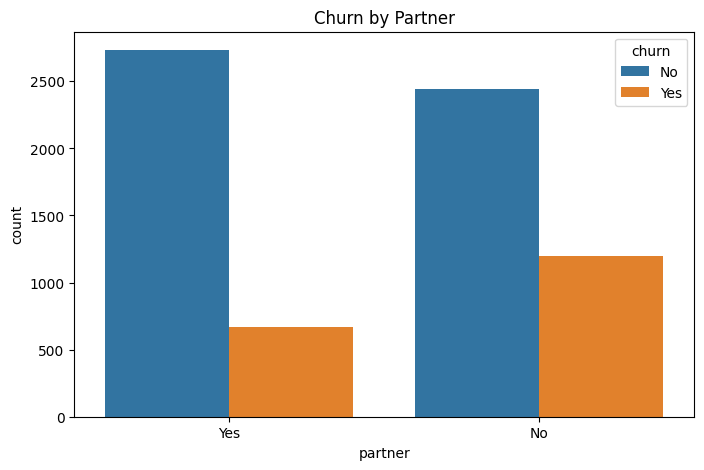

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='partner', hue='churn')
plt.title('Churn by Partner')
plt.show()

In [36]:
cont = pd.crosstab(df['partner'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['partner'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn      No   Yes
partner            
No       2441  1200
Yes      2733   669

percentages
churn           No        Yes
partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903


In [37]:
chi2, p, _, _ = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between partner and churn")
else:
    print("There is no significant association between partner and churn")

Chi-square statistic: 158.7334
P-value: 0.0000
There is a significant association between partner and churn


In [38]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.1501


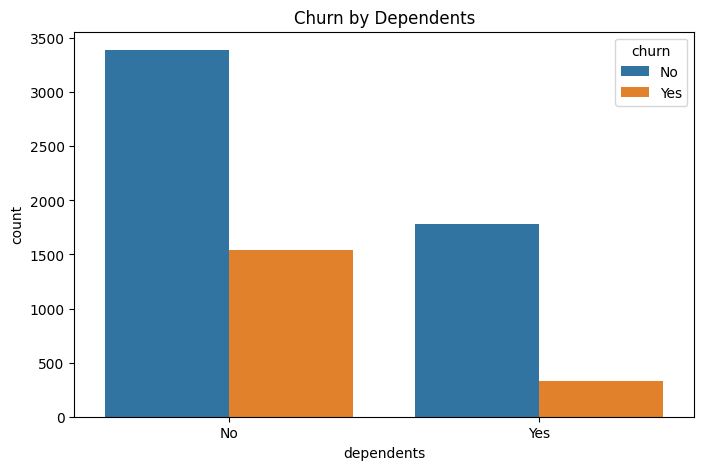

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='dependents', hue='churn')
plt.title('Churn by Dependents')
plt.show()

In [39]:
cont = pd.crosstab(df['dependents'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['dependents'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn         No   Yes
dependents            
No          3390  1543
Yes         1784   326

percentages
churn              No        Yes
dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237


In [40]:
chi2, p, _, _ = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between dependents and churn")
else:
    print("There is no significant association between dependents and churn")

Chi-square statistic: 189.1292
P-value: 0.0000
There is a significant association between dependents and churn


In [41]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.1639


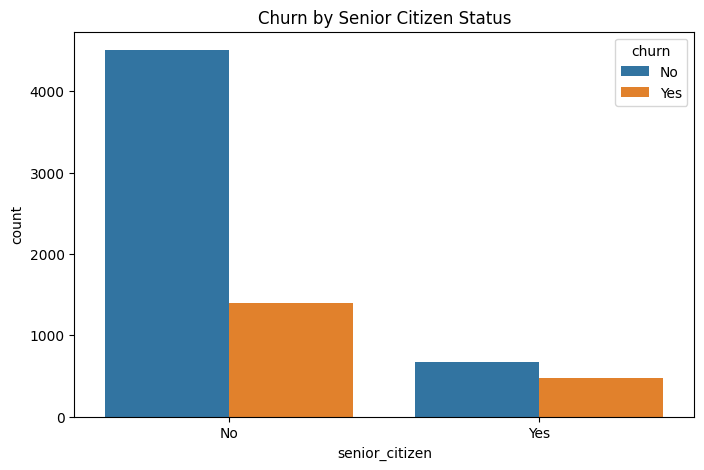

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='senior_citizen', hue='churn')
plt.title('Churn by Senior Citizen Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [27]:
cont = pd.crosstab(df['senior_citizen'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['senior_citizen'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn             No   Yes
senior_citizen            
0               4508  1393
1                666   476

percentages
churn                  No        Yes
senior_citizen                      
0               76.393832  23.606168
1               58.318739  41.681261


In [28]:
chi2, p, _, _ = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between senior_citizen and churn")
else:
    print("There is no significant association between senior_citizen and churn")

Chi-square statistic: 159.4263
P-value: 0.0000
There is a significant association between senior_citizen and churn


In [29]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.1505


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          7043 non-null   object 
 1   gender               7043 non-null   object 
 2   senior_citizen       7043 non-null   int64  
 3   partner              7043 non-null   object 
 4   dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   phone_service        7043 non-null   object 
 7   multiple_lines       7043 non-null   object 
 8   internet_service     7043 non-null   object 
 9   online_security      7043 non-null   object 
 10  online_backup        7043 non-null   object 
 11  device_protection    7043 non-null   object 
 12  tech_support         7043 non-null   object 
 13  streaming_tv         7043 non-null   object 
 14  streaming_movies     7043 non-null   object 
 15  contract             7043 non-null   o

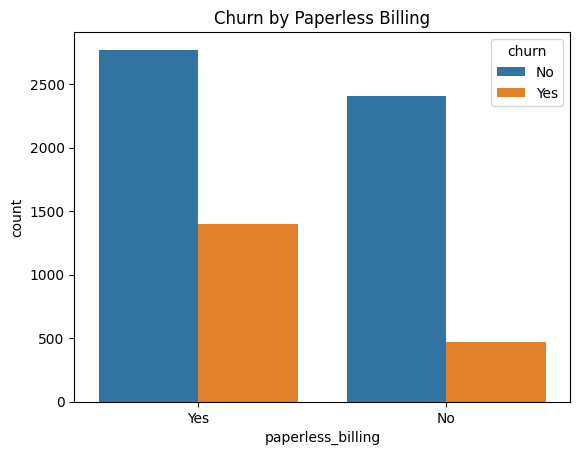

In [63]:
sns.countplot(data=df, x='paperless_billing', hue='churn')
plt.title('Churn by Paperless Billing')
plt.show()

In [64]:
cont = pd.crosstab(df['paperless_billing'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['paperless_billing'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn                No   Yes
paperless_billing            
No                 2403   469
Yes                2771  1400

percentages
churn                     No        Yes
paperless_billing                      
No                 83.669916  16.330084
Yes                66.434908  33.565092


In [66]:
chi2, p, dof, expected = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between Paperless Billing and churn")
else:
    print("There is no significant association between Paperless Billing and churn")

Chi-square statistic: 258.2776
P-value: 0.0000
There is a significant association between Paperless Billing and churn


In [67]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.1915


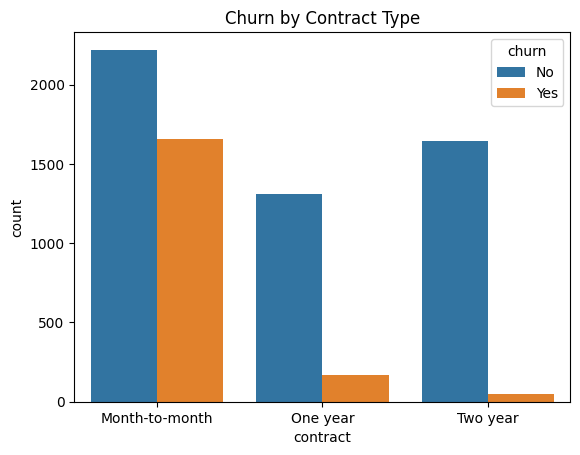

In [16]:
sns.countplot(data=df, x='contract', hue='churn')
plt.title('Churn by Contract Type')
plt.show()

In [30]:
cont = pd.crosstab(df['contract'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['contract'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn             No   Yes
contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

percentages
churn                  No        Yes
contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


In [31]:
chi2, p, dof, expected = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between Contract Type and churn")
else:
    print("There is no significant association between Contract Type and churn")

Chi-square statistic: 1184.5966
P-value: 0.0000
There is a significant association between Contract Type and churn


In [32]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.4101


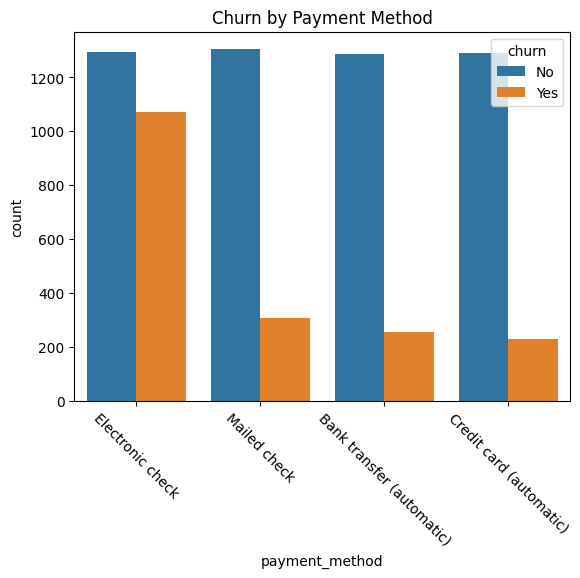

In [36]:
sns.countplot(data=df, x='payment_method', hue='churn')
plt.title('Churn by Payment Method')
plt.xticks(rotation=-45)
plt.show()

In [44]:
cont = pd.crosstab(df['payment_method'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['payment_method'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn                        No   Yes
payment_method                       
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

percentages
churn                             No        Yes
payment_method                                 
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


In [45]:
chi2, p, dof, expected = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between Payment Method and churn")
else:
    print("There is no significant association between Payment Method and churn")

Chi-square statistic: 648.1423
P-value: 0.0000
There is a significant association between Payment Method and churn


In [46]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.3034


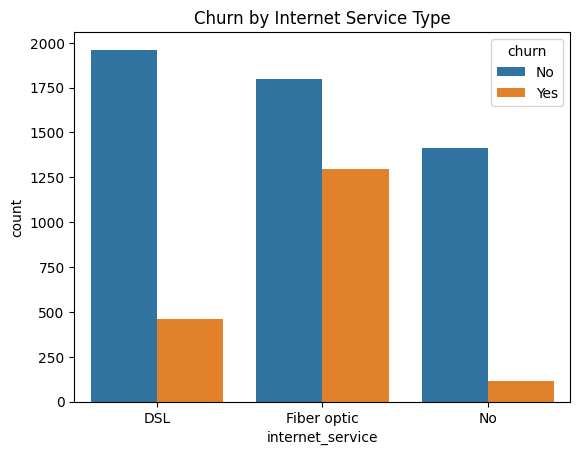

In [35]:
sns.countplot(data=df, x='internet_service', hue='churn')
plt.title('Churn by Internet Service Type')
plt.show()

In [47]:
cont = pd.crosstab(df['internet_service'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['internet_service'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn               No   Yes
internet_service            
DSL               1962   459
Fiber optic       1799  1297
No                1413   113

percentages
churn                    No        Yes
internet_service                      
DSL               81.040892  18.959108
Fiber optic       58.107235  41.892765
No                92.595020   7.404980


In [48]:
chi2, p, dof, expected = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between Internet Service and churn")
else:
    print("There is no significant association between Internet Service and churn")

Chi-square statistic: 732.3096
P-value: 0.0000
There is a significant association between Internet Service and churn


In [49]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.3225


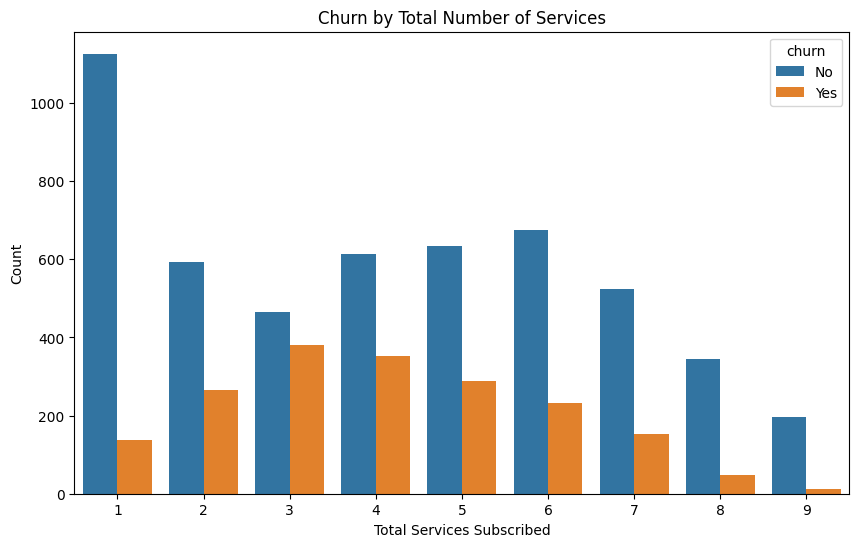

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='num_services', hue='churn')
plt.title('Churn by Total Number of Services')
plt.xlabel('Total Services Subscribed')
plt.ylabel('Count')
plt.show()

In [50]:
cont = pd.crosstab(df['num_services'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['num_services'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn           No  Yes
num_services           
1             1126  138
2              593  266
3              466  380
4              613  352
5              633  289
6              676  232
7              524  152
8              346   49
9              197   11

percentages
churn                No        Yes
num_services                      
1             89.082278  10.917722
2             69.033760  30.966240
3             55.082742  44.917258
4             63.523316  36.476684
5             68.655098  31.344902
6             74.449339  25.550661
7             77.514793  22.485207
8             87.594937  12.405063
9             94.711538   5.288462


In [51]:
chi2, p, dof, expected = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between Number of Services and churn")
else:
    print("There is no significant association between Number of Services and churn")

Chi-square statistic: 468.0508
P-value: 0.0000
There is a significant association between Number of Services and churn


In [22]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.2578


In [56]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'num_services', 'tenure_category', 'avg_monthly_charges'],
      dtype='object')

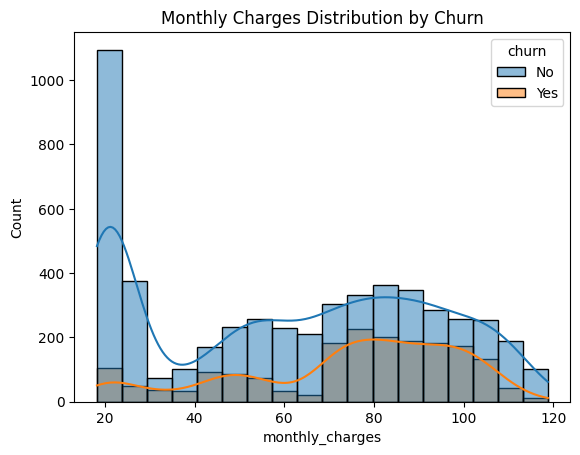

In [30]:
sns.histplot(data=df, x='monthly_charges', hue='churn', kde=True)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

In [59]:
from scipy.stats import mannwhitneyu

churn_yes = df[df['churn'] == 'Yes']['monthly_charges']
churn_no = df[df['churn'] == 'No']['monthly_charges']

u_stat, p_value = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value <= 0.05:
    print("There is a significant difference in monthly_charges between churn groups.")
else:
    print("There is no significant difference in monthly_charges between churn groups.")

U-statistic: 6003125.5000
P-value: 0.0000
There is a significant difference in monthly_charges between churn groups.


In [ ]:
n1 = len(churn_yes)
n2 = len(churn_no)

r = 1 - (2 * u_stat) / (n1 * n2)

print(f"Effect size (r): {r:.4f}")

Effect size (r): -0.2416


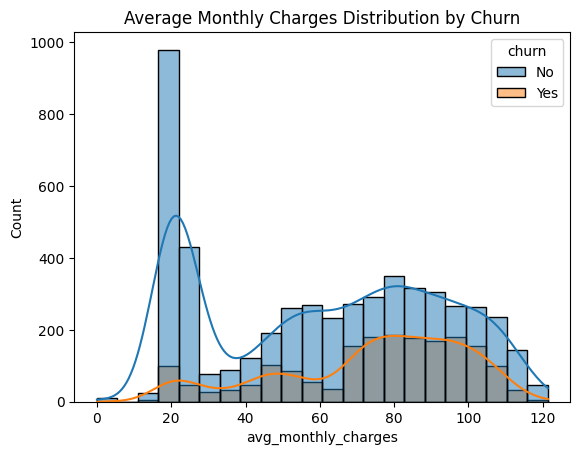

In [57]:
sns.histplot(data=df, x='avg_monthly_charges', hue='churn', kde=True)
plt.title('Average Monthly Charges Distribution by Churn')
plt.show()

In [68]:
from scipy.stats import mannwhitneyu

churn_yes = df[df['churn'] == 'Yes']['avg_monthly_charges']
churn_no = df[df['churn'] == 'No']['avg_monthly_charges']

u_stat, p_value = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value <= 0.05:
    print("There is a significant difference in avg_monthly_charges between churn groups.")
else:
    print("There is no significant difference in avg_monthly_charges between churn groups.")

U-statistic: 6008945.5000
P-value: 0.0000
There is a significant difference in avg_monthly_charges between churn groups.


In [69]:
n1 = len(churn_yes)
n2 = len(churn_no)

r = 1 - (2 * u_stat) / (n1 * n2)

print(f"Effect size (r): {r:.4f}")

Effect size (r): -0.2428


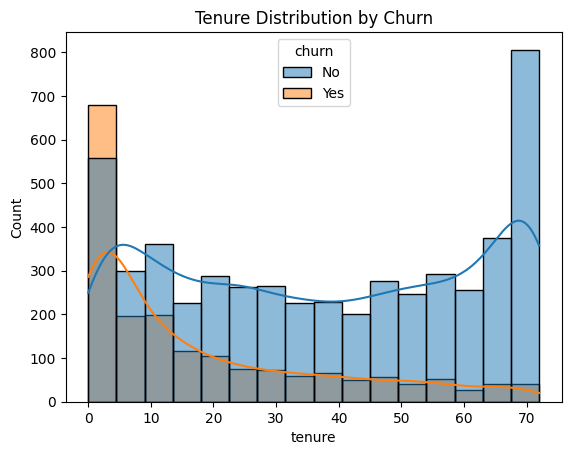

In [31]:
sns.histplot(data=df, x='tenure', hue='churn', kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()

In [70]:
from scipy.stats import mannwhitneyu

churn_yes = df[df['churn'] == 'Yes']['tenure']
churn_no = df[df['churn'] == 'No']['tenure']

u_stat, p_value = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value <= 0.05:
    print("There is a significant difference in tenure between churn groups.")
else:
    print("There is no significant difference in tenure between churn groups.")

U-statistic: 2515538.0000
P-value: 0.0000
There is a significant difference in tenure between churn groups.


In [71]:
n1 = len(churn_yes)
n2 = len(churn_no)

r = 1 - (2 * u_stat) / (n1 * n2)

print(f"Effect size (r): {r:.4f}")

Effect size (r): 0.4797


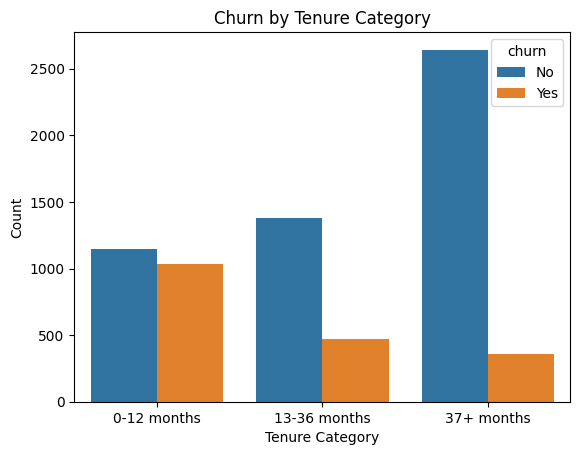

In [43]:
sns.countplot(data=df, x='tenure_category', hue='churn')
plt.title('Churn by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Count')
plt.show()

In [52]:
cont = pd.crosstab(df['tenure_category'], df['churn'])
print("counts")
print(cont)

print("\npercentages")
percentages = pd.crosstab(df['tenure_category'], df['churn'], normalize='index') * 100
print(percentages)

counts
churn              No   Yes
tenure_category            
0-12 months      1149  1037
13-36 months     1382   474
37+ months       2643   358

percentages
churn                   No        Yes
tenure_category                      
0-12 months      52.561757  47.438243
13-36 months     74.461207  25.538793
37+ months       88.070643  11.929357


In [54]:
chi2, p, dof, expected = chi2_contingency(cont)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p <= 0.05:
    print("There is a significant association between Tenure Category and churn")
else:
    print("There is no significant association between Tenure Category and churn")

Chi-square statistic: 819.2887
P-value: 0.0000
There is a significant association between Tenure Category and churn


In [55]:
n = cont.sum().sum()

r, k = cont.shape

cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(f"Cramer's V: {cramer_v:.4f}")

Cramer's V: 0.3411


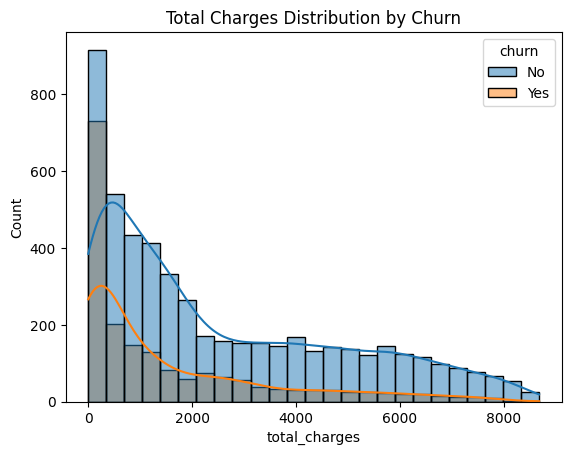

In [34]:
sns.histplot(data=df, x='total_charges', hue='churn', kde=True)
plt.title('Total Charges Distribution by Churn')
plt.show()

In [72]:
from scipy.stats import mannwhitneyu

churn_yes = df[df['churn'] == 'Yes']['total_charges']
churn_no = df[df['churn'] == 'No']['total_charges']

u_stat, p_value = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value <= 0.05:
    print("There is a significant difference in total_charges between churn groups.")
else:
    print("There is no significant difference in total_charges between churn groups.")

U-statistic: 3381224.0000
P-value: 0.0000
There is a significant difference in total_charges between churn groups.


In [73]:
n1 = len(churn_yes)
n2 = len(churn_no)

r = 1 - (2 * u_stat) / (n1 * n2)

print(f"Effect size (r): {r:.4f}")

Effect size (r): 0.3007


In [ ]:
# Cell 7: Bivariate analysis - Tenure and Charges vs Churn
# Business insight: Short-tenure customers with high charges are high-risk; retention offers could target them early.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0])
axes[0].set_title('Tenure by Churn Status')

# Monthly Charges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn Status')

plt.tight_layout()
plt.show()

In [ ]:
# Cell 8: Correlation heatmap (numeric features)
# Business insight: Strong correlations (e.g., tenure with total charges) highlight dependencies; weak ones with churn suggest other factors at play.
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numeric_cols + ['Churn']].corr()  # Encode Churn as 0/1 if needed
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Cell 9: Segmentation - High-risk groups
# Business insight: Identify segments (e.g., short tenure + high charges) for targeted retention; estimate potential savings.
# Example: Filter high-risk (tenure < 12 months, MonthlyCharges > 70)
high_risk = df[(df['tenure'] < 12) & (df['MonthlyCharges'] > 70)]
print(f"High-risk customers: {len(high_risk)} ({len(high_risk)/len(df)*100:.2f}% of total)")
print(f"Churn rate in high-risk: {high_risk['Churn'].value_counts(normalize=True)['Yes']*100:.2f}%")

# Visualize high-risk churn
sns.countplot(data=high_risk, x='Churn')
plt.title('Churn in High-Risk Segment')
plt.show()

In [ ]:
# Cell 10: Business simulation - Rough revenue impact
# Assumption: Average customer value = $500/year (adjust based on data); retention cost = $50/customer.
# Insight: If retaining 50% of high-risk churners saves more than costs, it's worth it.
avg_value = 500  # Placeholder; calculate from data if available
retention_cost = 50
potential_savers = len(high_risk) * (high_risk['Churn'].value_counts(normalize=True)['Yes'])
savings = potential_savers * 0.5 * avg_value  # Assuming 50% retention success
cost = len(high_risk) * retention_cost
net_profit = savings - cost
print(f"Potential Savings: ${savings:.0f}, Cost: ${cost:.0f}, Net Profit: ${net_profit:.0f}")

In [ ]:
# Update Cell 10 for simpler simulation using monthly loss

# Assuming retention cost per customer and success rate
retention_cost = 50  # per customer
retention_success_rate = 0.5  # 50% of high-risk churners retained

# High-risk churners' monthly loss
high_risk_churners = high_risk[high_risk['Churn'] == 'Yes']
monthly_loss_per_churner = high_risk_churners['monthly_charges'].mean()  # or sum, depending on perspective

# Potential savings: retained customers' monthly revenue
potential_monthly_savings = len(high_risk_churners) * retention_success_rate * monthly_loss_per_churner
total_cost = len(high_risk) * retention_cost  # Cost for all high-risk, assuming targeting all
net_profit = potential_monthly_savings - total_cost

print(f"Potential Monthly Savings: ${potential_monthly_savings:.2f}")
print(f"Total Retention Cost: ${total_cost:.2f}")
print(f"Net Profit: ${net_profit:.2f}")